In [20]:
import numpy as np
import pandas as pd
import sklearn as sk

In [21]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [22]:
# Delete the last two columns
df = df.iloc[:, :-2]

In [23]:
# We find that there exist 'Unknown' in some features, we need to transfer the 'Unknown' to 'Nan'
df = df.replace({'Unknown': np.nan})
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [24]:
unique_counts = {}
for column in df.columns:
    unique_counts[column] = df[column].nunique()

# print the number of unique, which can help us identify the discrete variable
for column, count in unique_counts.items():
    print(f"Number of unique values in column '{column}': {count}")


Number of unique values in column 'CLIENTNUM': 10127
Number of unique values in column 'Attrition_Flag': 2
Number of unique values in column 'Customer_Age': 45
Number of unique values in column 'Gender': 2
Number of unique values in column 'Dependent_count': 6
Number of unique values in column 'Education_Level': 6
Number of unique values in column 'Marital_Status': 3
Number of unique values in column 'Income_Category': 5
Number of unique values in column 'Card_Category': 4
Number of unique values in column 'Months_on_book': 44
Number of unique values in column 'Total_Relationship_Count': 6
Number of unique values in column 'Months_Inactive_12_mon': 7
Number of unique values in column 'Contacts_Count_12_mon': 7
Number of unique values in column 'Credit_Limit': 6205
Number of unique values in column 'Total_Revolving_Bal': 1974
Number of unique values in column 'Avg_Open_To_Buy': 6813
Number of unique values in column 'Total_Amt_Chng_Q4_Q1': 1158
Number of unique values in column 'Total_T

In [25]:
discrete_feature = ['Dependent_count', 'Education_Level', 'Income_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

## Data Processing

In [26]:
#we directly drop the nan sample.
df.dropna(inplace=True)
len(df)

7081

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer':1})
df['Gender'] = df['Gender'].replace({'M': 0, 'F':1})
salary_transfer ={'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4}
education_transfer = {'Uneducated': 0, 'High School':1, 'College': 2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate':5}
df['Credit_Limit'] = np.log(df['Credit_Limit'])
df['Total_Trans_Amt'] = np.log(df['Total_Trans_Amt'])
df['Income_Category'] = df['Income_Category'].replace(salary_transfer)
df['Education_Level'] = df['Education_Level'].replace(education_transfer)
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df.drop('Card_Category', axis=1, inplace=True)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,0,3,1,1,2,39,5,1,3,9.448648,777,11914.0,1.335,7.042286,42,1.625,0.061
1,818770008,0,49,1,5,3,2,0,44,6,1,2,9.018695,864,7392.0,1.541,7.163172,33,3.714,0.105
2,713982108,0,51,0,3,3,1,3,36,4,1,0,8.136811,0,3418.0,2.594,7.542744,20,2.333,0.000
4,709106358,0,40,0,3,0,1,2,21,5,1,0,8.458716,0,4716.0,2.175,6.704414,28,2.500,0.000
5,713061558,0,44,0,2,3,1,1,36,3,1,2,8.296547,1247,2763.0,1.376,6.992096,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,0,54,0,1,1,2,2,34,5,2,0,9.542518,2109,11831.0,0.660,9.653551,114,0.754,0.151
10121,713899383,0,56,1,1,3,2,0,50,4,1,4,8.212840,606,3082.0,0.570,9.588503,120,0.791,0.164
10122,772366833,0,50,0,2,3,2,1,40,3,2,3,8.294799,1851,2152.0,0.703,9.647046,117,0.857,0.462
10124,716506083,1,44,1,1,1,1,0,36,5,3,4,8.595820,0,5409.0,0.819,9.239025,60,0.818,0.000


In [28]:
df1 = df.copy()

## Data Generlization

In [29]:
def feature_generation(df, cats, features, types):
    for cat in cats:
        for feature in features:
            stat = df.groupby(cat)[feature].agg(types)
            col_names = list()
            for type in types:
                col_name = cat+'_'+ feature + '_' + type
                col_names.append(col_name)
            stat.columns = col_names
            df = pd.merge(df, stat, on=cat)

    return df 

In [30]:
cats = ['Income_Category','Education_Level', 'Gender', 'Marital_Status']
c_features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Credit_Limit']
c_types = ['mean', 'max', 'min']
df1 = feature_generation(df1, cats=cats, features=c_features, types = c_types)
df1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,...,Marital_Status_Total_Trans_Amt_min,Marital_Status_Total_Trans_Ct_mean,Marital_Status_Total_Trans_Ct_max,Marital_Status_Total_Trans_Ct_min,Marital_Status_Total_Revolving_Bal_mean,Marital_Status_Total_Revolving_Bal_max,Marital_Status_Total_Revolving_Bal_min,Marital_Status_Credit_Limit_mean,Marital_Status_Credit_Limit_max,Marital_Status_Credit_Limit_min
0,768805383,0,45,0,3,1,1,2,39,5,...,6.234411,61.358866,131,10,1207.743266,2517,0,8.536945,10.449178,7.271217
1,778493808,0,49,0,3,1,1,2,37,5,...,6.234411,61.358866,131,10,1207.743266,2517,0,8.536945,10.449178,7.271217
2,709531908,0,53,0,3,1,1,2,47,5,...,6.234411,61.358866,131,10,1207.743266,2517,0,8.536945,10.449178,7.271217
3,712701333,0,53,0,3,1,1,2,43,5,...,6.234411,61.358866,131,10,1207.743266,2517,0,8.536945,10.449178,7.271217
4,788194458,0,34,0,3,1,1,2,26,4,...,6.234411,61.358866,131,10,1207.743266,2517,0,8.536945,10.449178,7.271217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,717783483,0,47,1,5,4,0,0,30,4,...,6.660575,67.286467,127,20,1172.101933,2517,0,8.638233,10.449178,7.271217
7077,721276383,0,47,1,2,4,0,1,33,6,...,6.660575,67.286467,127,20,1172.101933,2517,0,8.638233,10.449178,7.271217
7078,711428733,0,50,1,3,4,0,1,39,3,...,6.660575,67.286467,127,20,1172.101933,2517,0,8.638233,10.449178,7.271217
7079,803197833,0,49,1,1,4,0,1,44,6,...,6.660575,67.286467,127,20,1172.101933,2517,0,8.638233,10.449178,7.271217


In [168]:
X = df.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y = df.Attrition_Flag

In [128]:
# In original data, the Attrition sample just accounts for about 16%. The data is imbalanced.
y.sum()/len(y)

0.15718118909758508

## Classifiers

In [64]:
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


class all_classifiers(object):
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def evaluate(self, classifier, x_test=None):
        if x_test is None:
            x_test = self.x_test
        prediction = classifier.predict(x_test)
        accuracy = metrics.accuracy_score(self.y_test, prediction)
        f1_score = metrics.f1_score(self.y_test, prediction)
        recall_score = metrics.recall_score(self.y_test, prediction)
        print('The Result: Accuracy is {}, f1_score is {}, recall_score: {}'.format(accuracy, f1_score, recall_score))
        result_dict = {'Accuracy': accuracy, 'F1_score': f1_score, 'Recall_score': recall_score}
        return result_dict
    
    def normalization(self):
        sd = StandardScaler()
        x_train_transfer = sd.fit_transform(self.x_train)
        x_test_transfer  = pd.DataFrame(x_train_transfer, columns = self.x_train.columns)
        x_test_transfer = sd.transform(self.x_test)
        x_test_transfer = pd.DataFrame(x_test_transfer, columns = self.x_test.columns)
        return x_train_transfer, x_test_transfer

    
    def fiting(self, classifier, params=None, scoring='f1',x_train=None):
        if x_train is None:
            x_train = self.x_train
        if params is not None:
            clf = GridSearchCV(classifier, params, n_jobs=-1, cv=5, verbose=0, refit=True, scoring=scoring)
            clf.fit(x_train, self.y_train)
            best_params = clf.best_params_
            classifier.set_params(**best_params)
            classifier.fit(self.x_train, self.y_train)
        else:
            classifier.fit(self.x_train, self.y_train)
            best_params = None

        return classifier, best_params
    
    def XGBC(self):
        clf = XGBClassifier()
        return clf
    
    def RF(self):
        clf = RandomForestClassifier()
        return clf
    
    def SVM(self):
        clf = svm.SVC(random_state=42)
        return clf 

    def LR(self):
        clf = LogisticRegression(random_state=42)
        return clf
    
    def MLP(self):
        clf = MLPClassifier(random_state=42)
        return clf

    def try_tree_model(self, RF_p=None, XGB_p=None, search=False):

        rf  = self.RF()
        xgbc = self.XGBC()

        model_list = [rf, xgbc]
        params_list = [RF_p, XGB_p]
        df = pd.DataFrame()
        count = 0
        for model, p in zip(model_list,params_list):
            if count==0:
                scoring = 'roc_auc'
            else:
                scoring = 'f1'
            clf, best_p = self.fiting(model, params=p, scoring=scoring)
            result_dict = self.evaluate(clf)
            best_p = str(best_p)
            result_dict.update({'Best_params': best_p})
            result_df = pd.DataFrame(result_dict, index=[0])
            df = df._append(result_df)
            count += 1
    
        return df
    
    def try_other_model(self, LR_p=None, SVM_p = None, MLP_p=None):
        lr = self.LR()
        svc = self.SVM()
        mlp = self.MLP()

        model_list = [lr, svc, mlp]
        params_list = [LR_p, SVM_p, MLP_p]
        df = pd.DataFrame()

        for model, p in zip(model_list,params_list):
            x_train_transfer, x_test_transfer = self.normalization()
            scoring = 'f1'
            #clf, best_p = self.fiting(model, params=p, scoring=scoring)
            clf, best_p = self.fiting(model, params=p, scoring=scoring, x_train=x_train_transfer)
            #result_dict = self.evaluate(clf)
            result_dict = self.evaluate(clf, x_test = x_test_transfer)
            best_p = str(best_p)
            result_dict.update({'Best_params': best_p})
            result_df = pd.DataFrame(result_dict, index=[0])
            df = df._append(result_df)
    
        return df



            


## Split the train test set

In [61]:
from sklearn.model_selection import train_test_split
X = df1.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y = df1.Attrition_Flag
X_origin_train, X_test, y_origin_train, y_test= train_test_split(X,y, random_state=42,test_size=0.2, stratify=y, shuffle=True)
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_origin_train, y_origin_train)

## Experiment in original data set
### Hyperparameter Searching

In [44]:
LR_p = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10], 'max_iter':[50]}
RF_p = {'criterion' : ["gini"],
        'n_estimators': range(1,201,15),
        "max_features":range(10,40,1)}
XGB_p = {'max_depth':range(2, 8), 'n_estimators':range(100, 1000, 100), 'learning_rate': [0.2, 0.25, 0.3, 0.35, 0.4,0.45, 0.5]}
MLP_p = {"hidden_layer_sizes": [(50, 128, 10)],
                             "solver": ['sgd'],
                             "max_iter": [100],
                             "verbose": [False],
                             'learning_rate':['adaptive'],
                             'alpha':[0.001,0.01,0.1]
                             }

In [47]:
# Tree model with no hyperparameter searching
tree = all_classifiers(X_origin_train, y_origin_train, X_test, y_test)
print('Tree models (No searching)-----------------------------------------------------')
tree_result1 = tree.try_tree_model(search=False)
tree_result1
print('Tree models (After searching)-----------------------------------------------------')
tree_result2 = tree.try_tree_model(RF_p=RF_p, XGB_p=XGB_p, search=True)
tree_result2

Tree models (No searching)-----------------------------------------------------
The Result: Accuracy is 0.9315455187014821, f1_score is 0.748051948051948, recall_score: 0.6457399103139013
The Result: Accuracy is 0.9689484827099506, f1_score is 0.898148148148148, recall_score: 0.8699551569506726
Tree models (After searching)-----------------------------------------------------
The Result: Accuracy is 0.9590684544812985, f1_score is 0.8625592417061613, recall_score: 0.8161434977578476
The Result: Accuracy is 0.9731827805222301, f1_score is 0.9112149532710279, recall_score: 0.874439461883408


,Accuracy,F1_score,Recall_score,Best_params
0,0.959068,0.862559,0.816143,"{'criterion': 'gini', 'max_features': 22, 'n_e..."
0,0.973183,0.911215,0.874439,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti..."


In [48]:
for p in tree_result2.Best_params:
    print(p)

{'criterion': 'gini', 'max_features': 22, 'n_estimators': 196}
{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}


In [66]:
import warnings
warnings.filterwarnings("ignore")
print('Other models (No searching)-----------------------------------------------------')
#other = all_classifiers(X_origin_train, y_origin_train, X_test, y_test)
other = all_classifiers(X_resampled, y_resampled , X_test, y_test)
result_3 = other.try_other_model()
result_3
print('Other models (After searching)-----------------------------------------------------')
result4 = other.try_other_model(LR_p=LR_p)
result4


Other models (No searching)-----------------------------------------------------
The Result: Accuracy is 0.784756527875794, f1_score is 0.507269789983845, recall_score: 0.7040358744394619
The Result: Accuracy is 0.15737473535638674, f1_score is 0.27195121951219514, recall_score: 1.0
The Result: Accuracy is 0.6838390966831334, f1_score is 0.346938775510204, recall_score: 0.5336322869955157
Other models (After searching)-----------------------------------------------------


/Users/johnlee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/johnlee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

The Result: Accuracy is 0.7671136203246295, f1_score is 0.5089285714285714, recall_score: 0.7668161434977578
The Result: Accuracy is 0.15737473535638674, f1_score is 0.27195121951219514, recall_score: 1.0
The Result: Accuracy is 0.6838390966831334, f1_score is 0.346938775510204, recall_score: 0.5336322869955157


,Accuracy,F1_score,Recall_score,Best_params
0,0.767114,0.508929,0.766816,"{'C': 1, 'max_iter': 50, 'penalty': 'l2'}"
0,0.157375,0.271951,1.000000,None
0,0.683839,0.346939,0.533632,None


In [69]:
from sklearn.model_selection import train_test_split

In [80]:
X_origin_train, X_test, y_origin_train, y_test= train_test_split(X,y, random_state=42,test_size=0.2, stratify=y, shuffle=True)
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_origin_train, y_origin_train)


In [71]:
from xgboost.sklearn import XGBClassifier

clf = XGBClassifier()

clf.fit(X_origin_train, y_origin_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
from sklearn import metrics
test_predict1 = clf.predict(X_test)
print(metrics.recall_score(y_test, test_predict1, pos_label=0))
print(metrics.classification_report(y_test, test_predict1))


0.9874371859296482
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1194
           1       0.93      0.87      0.90       223

    accuracy                           0.97      1417
   macro avg       0.95      0.93      0.94      1417
weighted avg       0.97      0.97      0.97      1417



In [73]:
from sklearn import metrics
clf2 = XGBClassifier()
clf2.fit(X_resampled, y_resampled)

test_predict2 = clf.predict(X_test)
print(metrics.recall_score(y_test, test_predict2, pos_label=0))
print(metrics.classification_report(y_test, test_predict2))
#print('The accuracy of the XGBoost is:',metrics.accuracy_score(y_test,test_predict2))

#print('The f1 of the XGBoost is:',metrics.f1_score(y_test,test_predict2))

0.9874371859296482
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1194
           1       0.93      0.87      0.90       223

    accuracy                           0.97      1417
   macro avg       0.95      0.93      0.94      1417
weighted avg       0.97      0.97      0.97      1417



In [31]:
from sklearn.model_selection import GridSearchCV

#params = {'max_depth':range(2, 7), 'n_estimators':range(100, 1000, 100), 'learning_rate': [0.1, 0.2, 0.25, 0.3,0.35, 0.4,0.45, 0.5]}

#xgbc_best = XGBClassifier()

#gs = GridSearchCV(xgbc_best, params, n_jobs=-1, cv=5, verbose=0, refit=True)

#gs.fit(X_resampled, y_resampled)

#print(gs.best_params_)

xgc = XGBClassifier(learning_rate=0.4, max_depth = 4, n_estimators = 300)

xgc.fit(X_resampled, y_resampled)

best_predict = xgc.predict(X_test)

print('The accuracy of the XGBoost is:',metrics.accuracy_score(y_test,best_predict))

print('The f1 of the XGBoost is:',metrics.f1_score(y_test,best_predict))


The accuracy of the XGBoost is: 0.9407198306280875
The f1 of the XGBoost is: 0.8306451612903226


In [134]:
feature_name= list(X.columns)
feature_name

['Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Income_Category_Total_Trans_Amt_mean',
 'Income_Category_Total_Trans_Amt_max',
 'Income_Category_Total_Trans_Amt_min',
 'Income_Category_Total_Trans_Ct_mean',
 'Income_Category_Total_Trans_Ct_max',
 'Income_Category_Total_Trans_Ct_min',
 'Income_Category_Total_Revolving_Bal_mean',
 'Income_Category_Total_Revolving_Bal_max',
 'Income_Category_Total_Revolving_Bal_min',
 'Income_Category_Credit_Limit_mean',
 'Income_Category_Credit_Limit_max',
 'Income_Category_Credit_Limit_min']

In [135]:
features_importance = list(clf.feature_importances_)

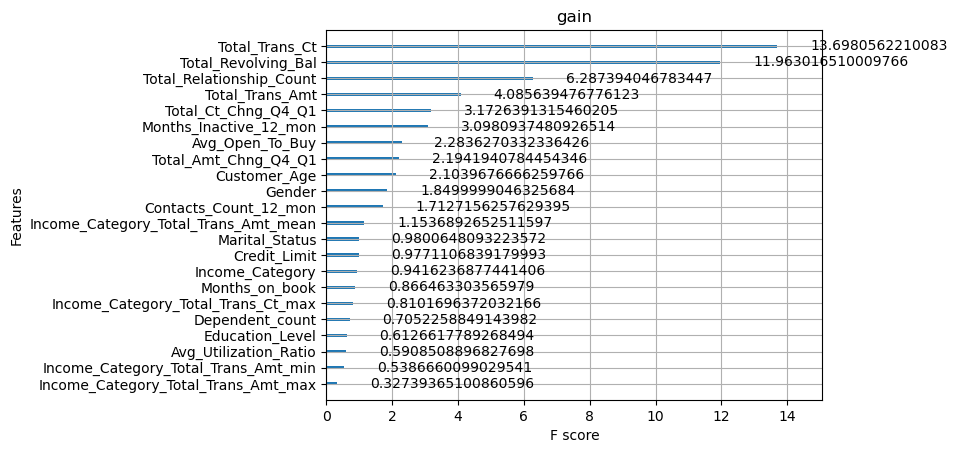

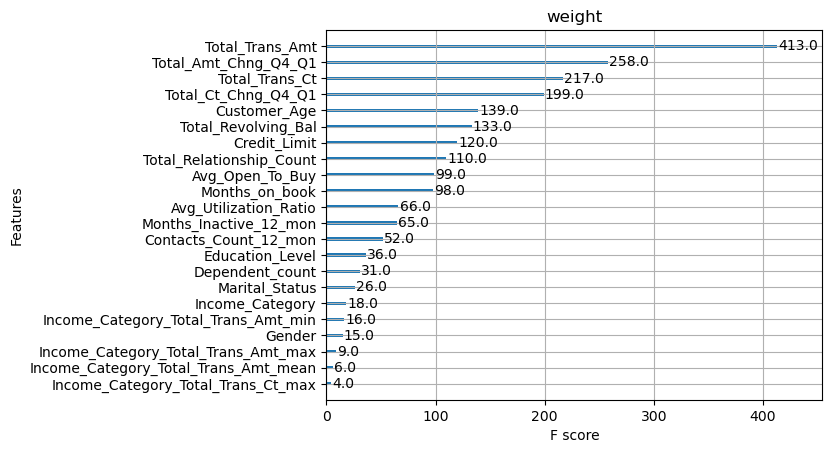

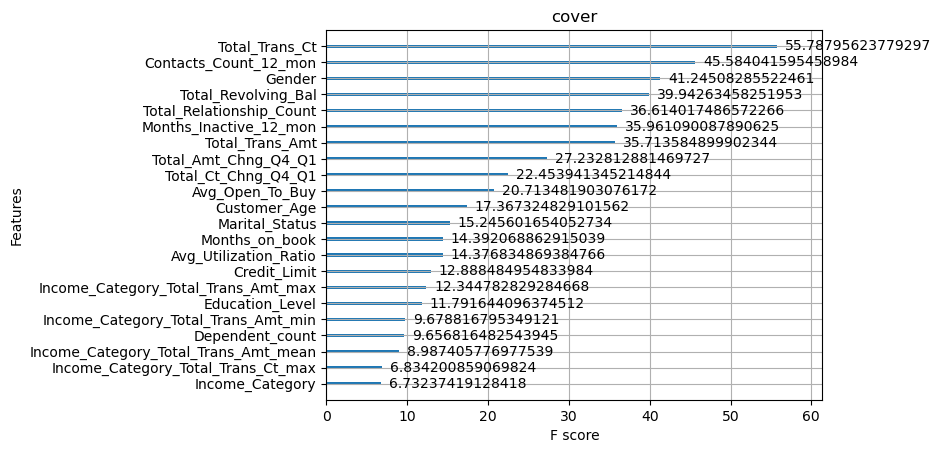

In [136]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

def estimate(model):

    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="weight")
    ax2.set_title('weight')
    ax3 = plot_importance(model, importance_type="cover")
    ax3.set_title('cover')
    plt.show()

estimate(clf)
